# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [4]:
df = pd.read_excel('/content/Online Retail.xlsx')

# Checking Top 5 Entries

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Check for missing values

In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# DataFrane Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Checking DataFrame Shape

In [8]:
df.shape

(541909, 8)

## Dropping Null Values

In [9]:
df = df.dropna()

## Remove duplicates

In [10]:
df = df.drop_duplicates()

## Remove rows with negative Quantity or UnitPrice

In [11]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

## Display the cleaned data

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Exploratory Data Analysis (EDA)**

### Convert InvoiceDate to datetime format

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Adding a new column for the month

In [14]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

###  Calculate monthly revenue

In [15]:
monthly_revenue = df.groupby('Month').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()
monthly_revenue['Revenue'] = (monthly_revenue['Quantity'] * monthly_revenue['UnitPrice']).round(2)

In [16]:
monthly_revenue

,Month,Quantity,UnitPrice,Revenue
0,2010-12,311048,3.142953,977609.20
1,2011-01,348473,3.155834,1099723.04
2,2011-02,265027,3.177686,842172.58
3,2011-03,347582,3.269996,1136591.72
4,2011-04,291366,3.501247,1020144.42
5,2011-05,372864,3.615606,1348129.35
6,2011-06,363014,3.142043,1140605.73
7,2011-07,367360,2.838771,1042850.75
8,2011-08,397373,2.944274,1169974.84
9,2011-09,543652,2.978656,1619352.53


## Plot monthly revenue

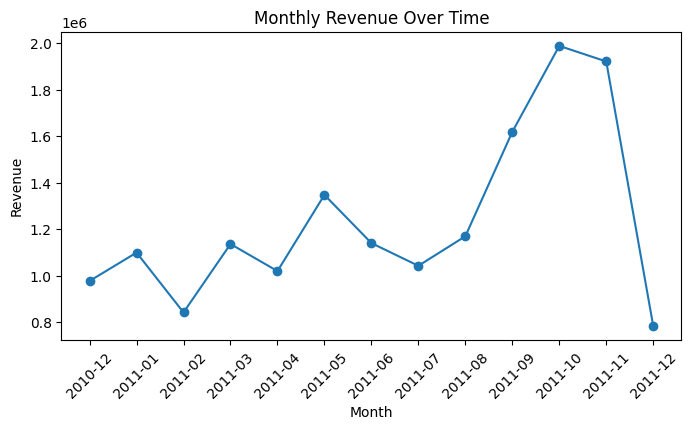

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# feature engineering

## We’ll create new features based on InvoiceDate, CustomerID, and StockCode

In [39]:
# Extract year, month, day, and weekday from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday

# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Outlier Detection
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df = detect_outliers_iqr(df, 'Quantity')
df = detect_outliers_iqr(df, 'UnitPrice')
df = detect_outliers_iqr(df, 'Revenue')

# Verify Revenue calculation
print(df[['Quantity', 'UnitPrice', 'Revenue']].head())

   Quantity  UnitPrice  Revenue
0         6       2.55    15.30
1         6       3.39    20.34
2         8       2.75    22.00
3         6       3.39    20.34
4         6       3.39    20.34


### Customer metrics: Average purchase frequency and total spend

In [19]:
customer_metrics = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique','Quantity': 'sum','UnitPrice': 'mean'
}).reset_index()
customer_metrics.rename(columns={'InvoiceNo': 'PurchaseFrequency'}, inplace=True)


In [20]:
customer_metrics

,CustomerID,PurchaseFrequency,Quantity,UnitPrice
0,12347.0,7,1701,2.300903
1,12348.0,3,140,0.650000
2,12349.0,1,511,2.566667
3,12350.0,1,196,1.581250
4,12352.0,7,500,3.125152
...,...,...,...,...
4141,18280.0,1,40,3.725000
4142,18281.0,1,52,1.092000
4143,18282.0,2,51,2.981250
4144,18283.0,16,1353,1.578006


## Merge PurchaseFrequency back into the original dataframe

In [21]:
df = pd.merge(df, customer_metrics[['CustomerID', 'PurchaseFrequency']], on='CustomerID', how='left')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error ,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Prepare the data for modeling
features = ['Year', 'Month', 'Day', 'Weekday', 'PurchaseFrequency', 'Quantity', 'UnitPrice']
X = df[features]
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Initialize and train the model

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions and evaluate

In [28]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Error: 0.0017006421000774583
Mean Squared Error: 0.0009976611209577529
Root Mean Squared Error: 0.031585774028156294
Mean Absolute Percentage Error: 0.0002279613231236537


# Feature importance

             Feature    Importance
5           Quantity  6.104954e-01
6          UnitPrice  3.894997e-01
2                Day  1.872494e-06
4  PurchaseFrequency  1.663157e-06
1              Month  7.699141e-07
3            Weekday  5.514076e-07
0               Year  1.249462e-07


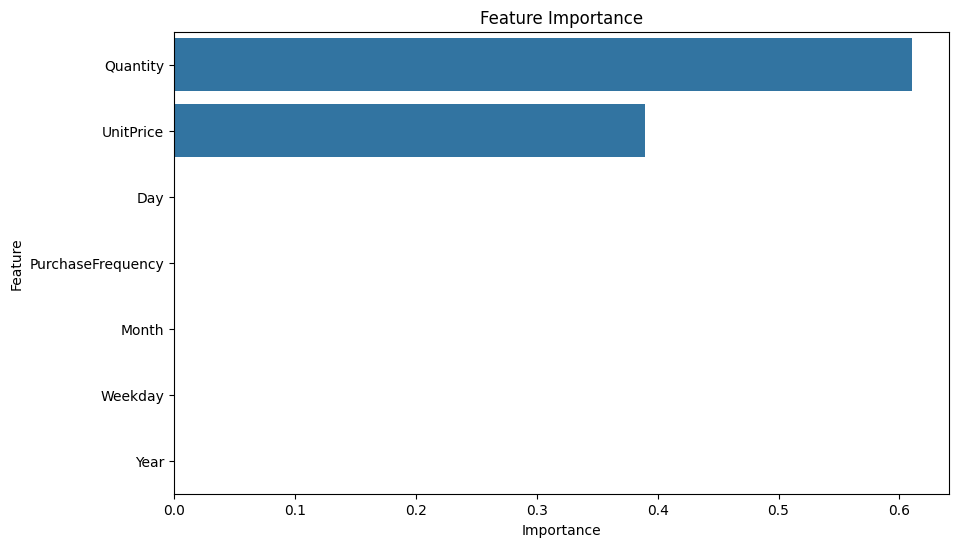

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()



# Analyze prediction errors

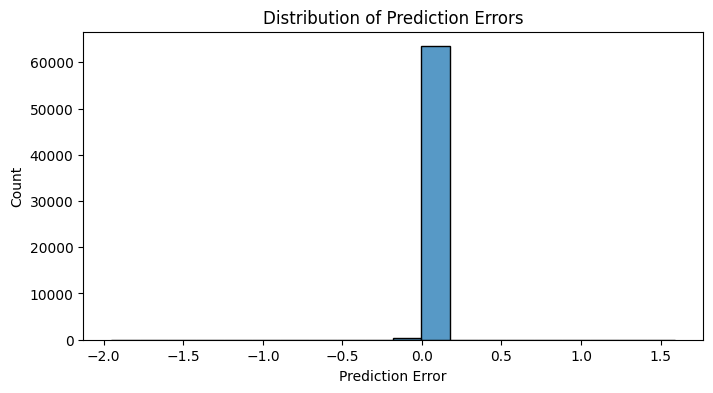

In [33]:
errors = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=20)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.show()


# Analyze the relationship between actual and predicted values

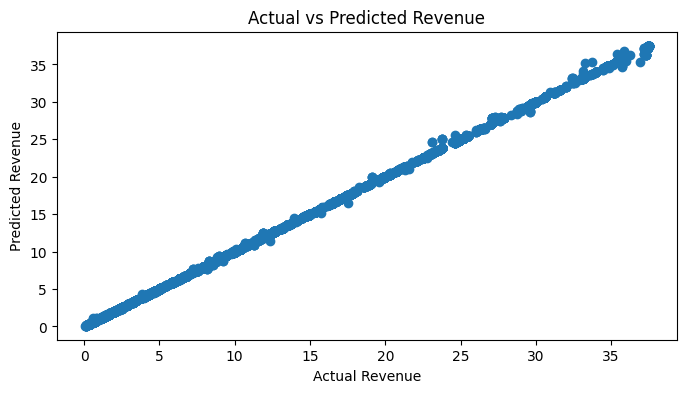

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

# Business insights

In [38]:
# Identify top contributing factors to revenue
print("Top contributing factors to revenue:", feature_importance['Feature'].head(3).tolist())

# Identify periods with high or low revenue
print("Months with highest revenue:", df.groupby('Month')['Revenue'].sum().sort_values(ascending=False).head(3))

# Identify customers with high purchase frequency
print("Customers with highest purchase frequency:", customer_metrics.sort_values('PurchaseFrequency', ascending=False).head(10))

Top contributing factors to revenue: ['Quantity', 'UnitPrice', 'Day']
Months with highest revenue: Month
11    517557.840
10    433568.010
9     388282.832
Name: Revenue, dtype: float64
Customers with highest purchase frequency:       CustomerID  PurchaseFrequency  Quantity  UnitPrice
319      12748.0                193     14507   1.943354
1804     14911.0                188     45039   2.293367
3842     17841.0                123     18964   2.026390
2085     15311.0                 91      6426   2.201319
1590     14606.0                 90      4880   2.054263
536      13089.0                 76     16662   1.902266
460      12971.0                 74      2321   1.941858
1535     14527.0                 54      1562   3.086018
1887     15039.0                 45      5998   2.164826
753      13408.0                 42      2469   1.752654
